In [ ]:
from sklearn.model_selection import train_test_split
from ImageFunctions import slicing, crop_images_to_brain
from DatasetModule import Set
from Model import CNN

Most of the functionallity is stored in module files. 
The data consist of Images with 3 channels and segmentation images with 2 channels.


In [ ]:
"Need to specify the local path on computer"
dir_path = "../Task3/"

In [ ]:
'Splitting the data into 30% test and 70% training.'
X_train, X_test = train_test_split(Set(dir_path), test_size=0.3, random_state=25)

In [ ]:
'Cropping images to only contain brain region'
X_train_temp = crop_images_to_brain(X_train)
X_test_temp = crop_images_to_brain(X_test)

In [ ]:
'Visualising slices of images along all three axis'
for i in range(len(X_train_temp)):
    for i in range(3):
        img = X_train_temp[i]['data'][0]
        img = img.float()
        slicing(img)

In order to access the set after they have been parsed through the dataloader:


To access a batch: batch = next(iter(<<Insert name here>>))


To access the data: batch['batchnumber']['data']


To access the segmentation: batch['batchnumber']['seg]

In [ ]:
'Load training and test set, batch size may vary'
train_set, test_set = DataLoader(X_train_temp, batch_size=2), DataLoader(X_test_temp, batch_size=1)

In [ ]:
tmp = next(iter(train_set))
image = tmp['data']
print(image.shape)
print(type(image))

In [ ]:
'Run the CNN'
model = CNN()
out_img = model(image)
print(out_img.shape)

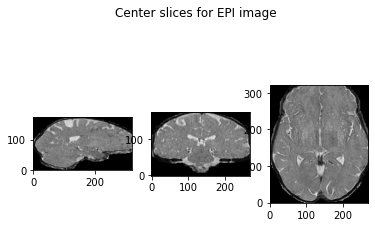

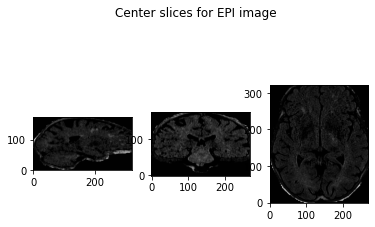

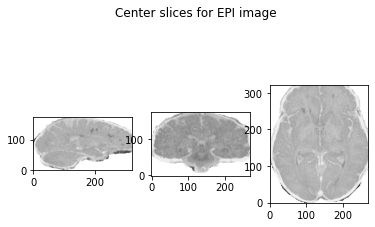

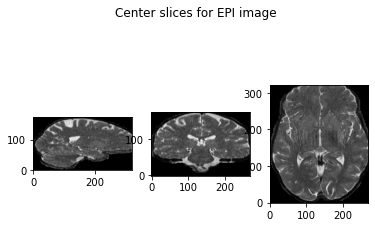

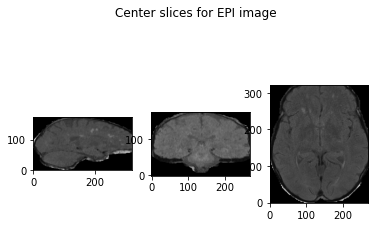

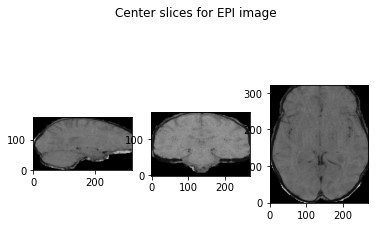

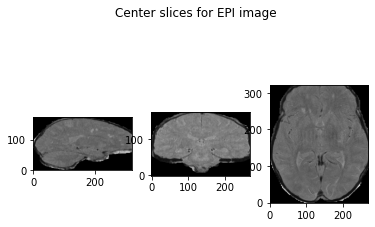

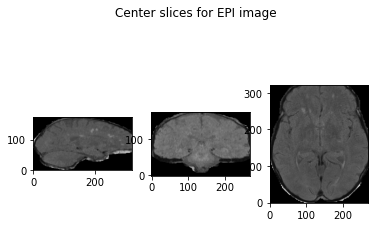

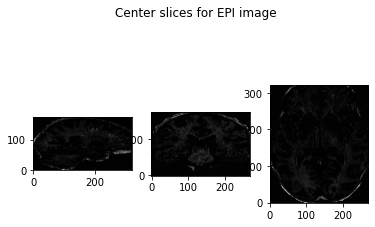

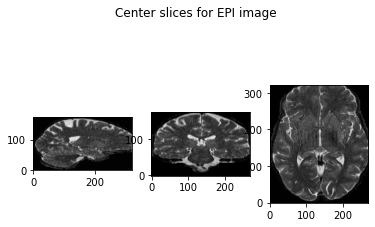

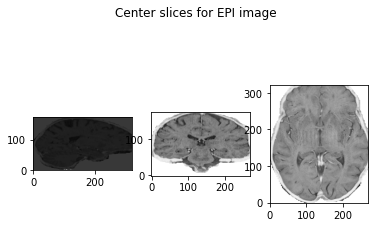

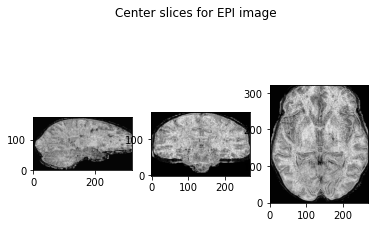

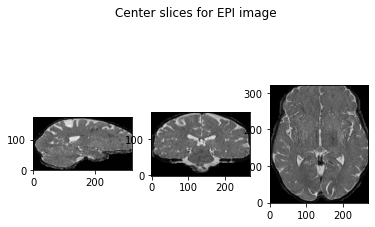

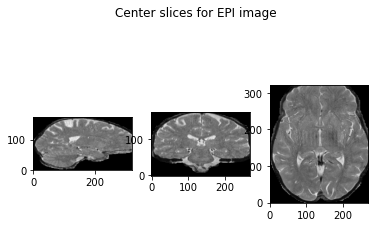

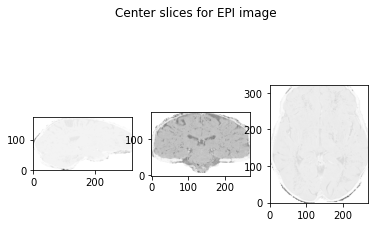

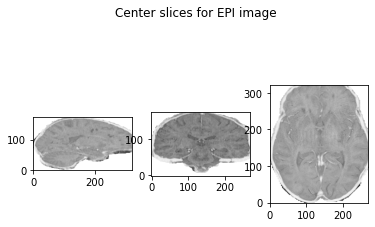

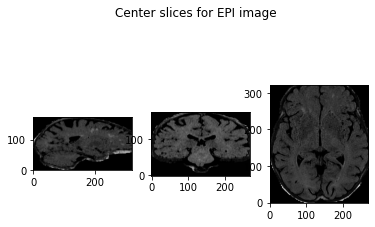

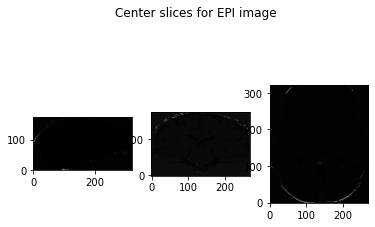

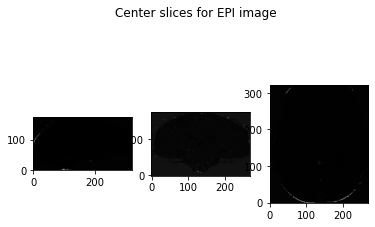

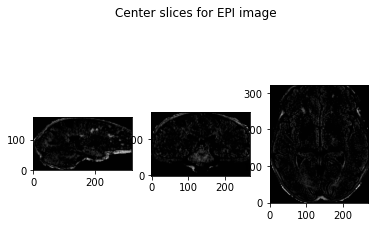

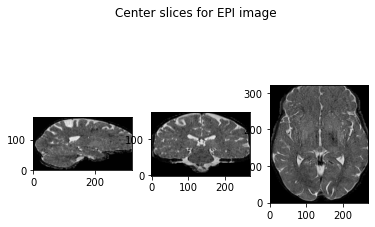

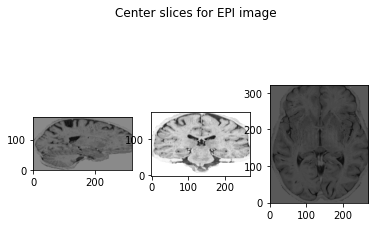

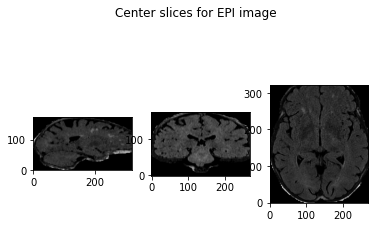

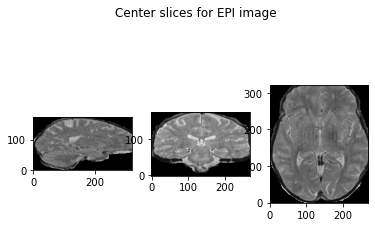

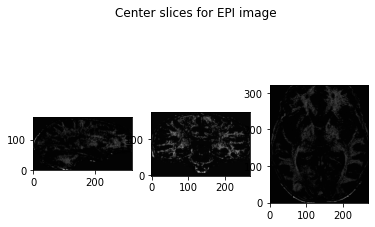

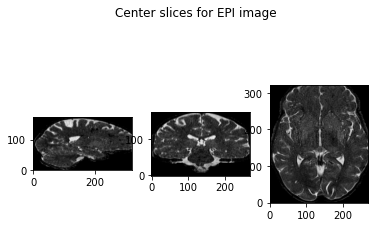

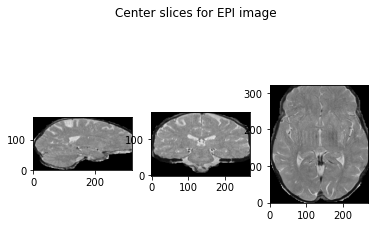

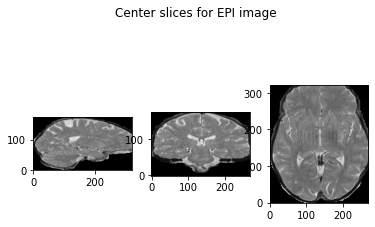

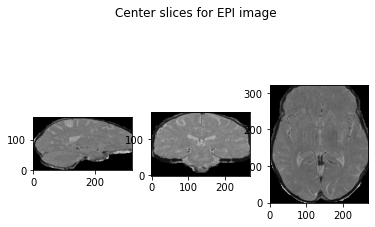

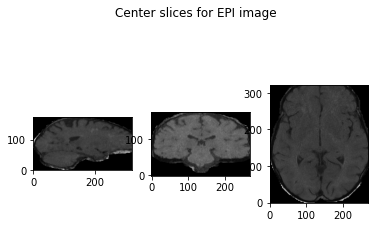

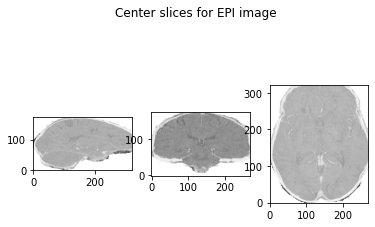

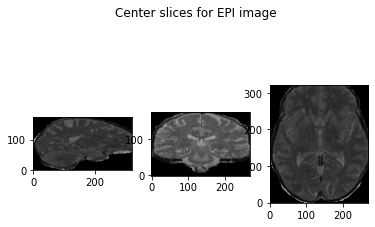

In [15]:
'Visualise all channels of a convolution layer'
img_arr = out_img.detach().numpy()
for i in range(len(img_arr[0])):
    slicing(img_arr[0][i])